microToolsTest
Basic demo of the microTools module showing how to import some data, make plots, etc.

Ira Thorpe
2018-06-04

In [7]:
# import
import numpy as np
import os
import pathlib
import healpy as hp
import pickle
import matplotlib.pyplot as plt
import microTools
import datetime
%matplotlib inline

In [8]:
# pick a segment time and load the data 
segment = 1147740231

# setup directory structure
p = pathlib.PurePath(os.getcwd())
baseDir = str(p.parent)

# load GRS1
chainFile = baseDir + '/data/' + str(segment) + '_grs1.pickle'
fid = open(chainFile,'rb')
data1 = pickle.load(fid, encoding = 'latin1')
fid.close()

# load GRS2
chainFile = baseDir + '/data/' + str(segment) +'_grs2.pickle'
if os.path.exists(chainFile) :
    fid = open(chainFile,'rb')
    data2 = pickle.load(fid)
    fid.close()

# make plot directory
plotDir = baseDir+'/plots/'+str(segment)
if not os.path.exists(plotDir):
    os.makedirs(plotDir)

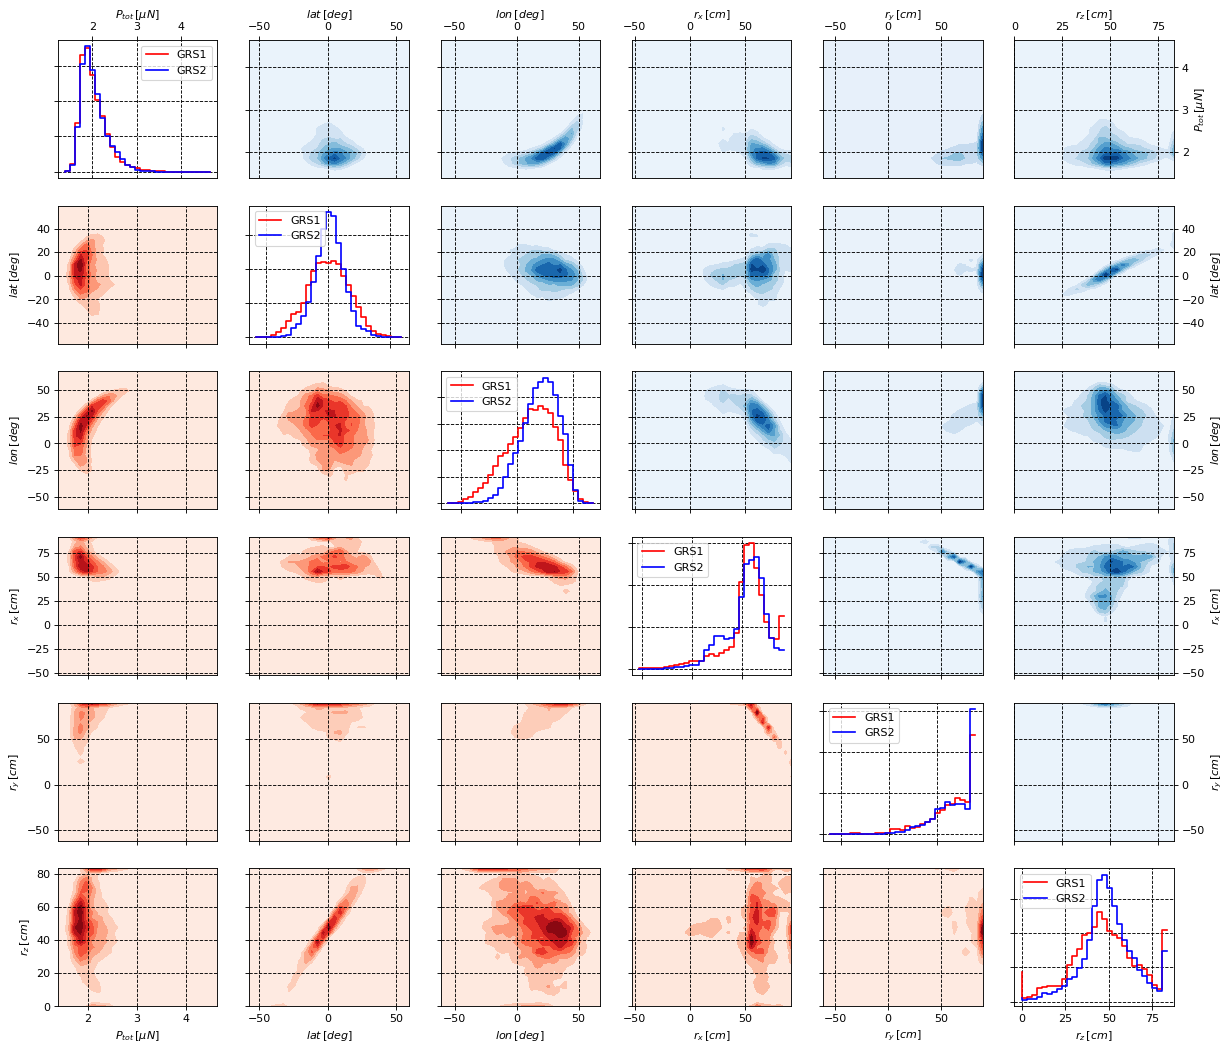

In [9]:
# produce and save the dual corner plot
hf = microTools.dualCorner(data1,data2)
hf.savefig(plotDir+'/dualCorner.png',format='png')

In [10]:
# make the skymaps in the two frames

# compute sunward sky angles
data1 = microTools.SCtoSun(data1)
data2 = microTools.SCtoSun(data2)

# make skymaps for GRS1
data1 = microTools.findSkyAngles(data1)
hp.mollview(data1['healPix'],
            cmap='OrRd', 
            cbar = False, 
            title='GRS1 Impact direction posterior for ' + str(int(data1['gps']))+ ' [spacecraft]')
hp.graticule()
hf = plt.gcf()
hf.savefig(plotDir+'/sky_SC1.png',format='png')

hp.mollview(data1['healPix_sun'],
            cmap='OrRd', 
            cbar = False, 
            title='GRS1 Impact direction posterior for ' + str(int(data1['gps']))+ ' [Sun]')
hp.graticule()
hf = plt.gcf()
hf.savefig(plotDir+'/sky_sun1.png',format='png')


# make skymaps for GRS2
data2 = microTools.findSkyAngles(data2)
hp.mollview(data2['healPix'],
            cmap='OrRd', 
            cbar = False, 
            title='GRS2 Impact direction posterior for ' + str(int(data2['gps']))+ ' [spacecraft]')
hp.graticule()
hf = plt.gcf()
hf.savefig(plotDir+'/sky_SC2.png',format='png')


hp.mollview(data2['healPix_sun'],
            cmap='OrRd', 
            cbar = False, 
            title='GRS2 Impact direction posterior for ' + str(int(data2['gps']))+ ' [Sun]')
hp.graticule()
hf = plt.gcf()
hf.savefig(plotDir+'/sky_sun2.png',format='png')



FileNotFoundError: [Errno 2] No such file or directory: '/Users/shouriha/LISAPathfinder/scripts/Analysis/data/quats.npy'

In [11]:
# print the table string (just a check)
tabStr = microTools.summaryString(data1)
print(tabStr)

KeyError: 'skyArea'